In [1]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [2]:
def longest_common_prefix(s1, s2):
    # prefix has to start from beginning of string
    i = 0
    while i < len(s1) and i < len(s2) and s1[i] == s2[i]:
        i += 1
    return s1[:i]

In [3]:
longest_common_prefix('ACCAATGT', 'ACCAGAC')

'ACCA'

In [4]:
def reverse_complement(s):
    # get the dna seq on the other strand in the other direction
    # alternative implementation without using dictionary
    complement = ['A', 'T', 'C', 'G']
    t = ''
    for base in s:
        base_idx = complement.index(base)
        offset = 0
        if base_idx in [1, 3]:
            offset = -1
        else:
            offset = 1
        t = complement[base_idx + offset] + t
    return t

In [5]:
assert reverse_complement('ATTG') == 'CAAT' # true
assert reverse_complement('ACCGTCG') == 'CGACGGT' # true

## Working with sequencing reads

In [6]:
# download fastq files
import os
if os.path.isfile('data/SRR835775_1.first1000.fastq') is False:
    !wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq  -O data/SRR835775_1.first1000.fastq 

In [7]:
!head -25 data/SRR835775_1.first1000.fastq 

@SRR835775.1 1/1
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC
+
???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################
@SRR835775.2 2/1
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC
+
CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########
@SRR835775.3 3/1
TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG
+
@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A
@SRR835775.4 4/1
TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA
+
@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################
@SRR835775.5 5/1
CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCAC

In [8]:
def readFastQ(filename):
    sequences = []
    qualities = []

    with open(filename, 'r') as f:
        while True:
            f.readline()
            seq = f.readline().rstrip()
            f.readline()
            qual = f.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return (sequences, qualities)

In [9]:
seq, qual = readFastQ('data/SRR835775_1.first1000.fastq')

In [10]:
seq[:25]

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC',
 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG',
 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA',
 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC',
 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCTACCCCTAACCCCCAACCCTCACACCAACCCTAACCCTACCCCCAACCCCAC',
 'TAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGCTGGGTTAGGGGTAGGGTTAGGGTTAGGGTTAGGGGTAGGAGTTCGGGAGAGCACACG',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAACCCCAACCCCAACCCCAACCCTAACCCTAAACCCAAACCTAAA',
 'AGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTGGGGTTAGGGTTGG',
 'TAGGGTTAGGGTTAGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG

In [11]:
qual[:25]

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################',
 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########',
 '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A',
 '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################',
 '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################',
 'CCCFFDFDHGHHDHHGIIIHGIJ<GBBBFBGGHDIH@B)?)0?F>DB#####################################################',
 "???=DD0@3ADB<<CE;+3<;EE?1:)1?C1?3BDCB@;)99)0;@;)-(.7A'55A1?.6;(6;.5;;??#############################",
 "@@@DDF?EFFHA;DDHGI<FDFGECCHF:C9DH9F3):??GHB)BFHEAHBG;C';C@EE45?#####################################",
 '@@@FADDFHGBFFHJJJFGEHGGGGCEGHCBFGGJ:D?FGIDHDFGIBFDGIJ=CEHDH7?=BFD@A;>AB5=2=?BB######################',
 '@CCFFADDHHH<CBGIICGGHIJI?FFGHJ?DHGIJ?DGIIIBFCHHI8@@GE

In [12]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [13]:
qual_score = []
for qual_string in qual:
    for qual in qual_string:
        qual_score.append(phred33ToQ(qual))

In [35]:
qual_score[:25]

[30,
 30,
 30,
 33,
 16,
 32,
 35,
 35,
 35,
 23,
 30,
 30,
 33,
 33,
 10,
 34,
 30,
 33,
 10,
 25,
 32,
 32,
 23,
 23,
 18]

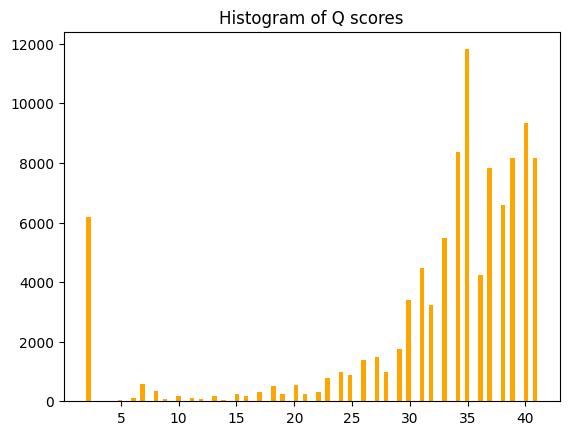

In [52]:
import matplotlib.pyplot as plt

plt.hist(qual_score,bins=100,color='orange')
plt.title("Histogram of Q scores")
plt.show()

In [53]:
def findGCByPos(reads):
    gc = [0] * 100
    totals = [0] * 100

    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1

    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])

    return gc    

In [54]:
gc = findGCByPos(seq)

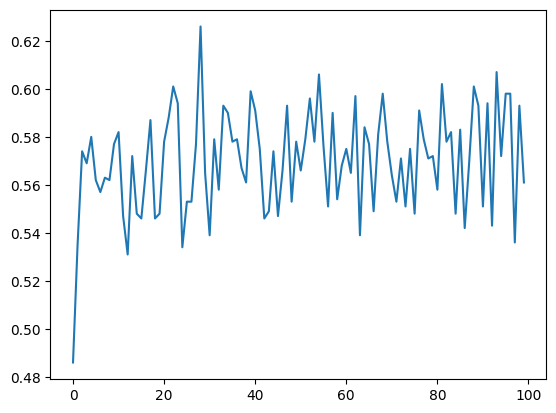

In [55]:
plt.plot(range(len(gc)), gc)
plt.show()

In [56]:
from collections import Counter
def getNDistribution(reads):
    count = Counter()
    for seq in reads:
        count.update(seq)
    return count

In [57]:
c = getNDistribution(seq)

In [58]:
c

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})

## Naive matching
    

In [59]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa -O data/phix.fa

--2023-10-13 15:53:09--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.225.0.145, 13.225.0.166, 13.225.0.220, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.225.0.145|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘data/phix.fa’

data/phix.fa        100%[===================>]   5.40K  --.-KB/s    in 0s      

2023-10-13 15:53:10 (1.17 GB/s) - ‘data/phix.fa’ saved [5528/5528]



In [60]:
!head -10 data/phix.fa

>gi|216019|gb|J02482.1|PX1CG Coliphage phi-X174, complete genome
GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGAGTCGAAAAATTATCTT
GATAAAGCAGGAATTACTACTGCTTGTTTACGAATTAAATCGAAGTGGACTGCTGGCGGAAAATGAGAAA
ATTCGACCTATCCTTGCGCAGCTCGAGAAGCTCTTACTTTGCGACCTTTCGCCATCAACTAACGATTCTG
TCAAAAACTGACGCGTTGGATGAGGAGAAGTGGCTTAATATGCTTGGCACGTTCGTCAAGGACTGGTTTA
GATATGAGTCACATTTTGTTCATGGTAGAGATTCTCTTGTTGACATTTTAAAAGAGCGTGGATTACTATC
TGAGTCCGATGCTGTTCAACCACTAATAGGTAAGAAATCATGAGTCAAGTTACTGAACAATCCGTACGTT
TCCAGACCGCTTTGGCCTCTATTAAGCTCATTCAGGCTTCTGCCGTTTTGGATTTAACCGAAGATGATTT
CGATTTTCTGACGAGTAACAAAGTTTGGATTGCTACTGACCGCTCTCGTGCTCGTCGCTGCGTTGAGGCT
TGCGTTTATGGTACGCTGGACTTTGTGGGATACCCTCGCTTTCCTGCTCCTGTTGAGTTTATTGCTGCCG


In [62]:
genome = readGenome('data/phix.fa')

In [65]:
genome[:100]

'GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGAGTCGAAAAATTATCTTGATAAAGCAGGAATTACTACTGCTTGTTTA'

In [66]:
def naive(p, t):
    occurs = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if not t[i+j] == p[j]:
                match = False
                break
            if match:
                occurs.append(i)
    return occurs

In [17]:
t = 'AGCTTAGATAGC'
p = 'AG'

In [25]:
def naive_match(p, t):
    occurs = []
    for i in range(len(t) - len(p) + 1):
        print(t[i:i+len(p)])
        if t[i:i+len(p)] == p:
            occurs.append(i)
    return occurs


In [26]:
naive_match(p, t)

AG
GC
CT
TT
TA
AG
GA
AT
TA
AG
GC


[0, 5, 9]